In [40]:
from qubo_util import *
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv (r'DataChain.csv', sep = ';')

In [85]:
def scale(X):
    X_ = np.atleast_2d(X)
    return pd.DataFrame(scaler.fit_transform(X_), X.index)

In [94]:
scaler = MinMaxScaler()
cols = df.columns[1:3]

In [95]:
g = df.groupby('Complexity')[cols]
min_, max_ = g.transform('min'), g.transform('max')
df[cols + '_scale'] = (df[cols] - min_) / (max_ - min_)

In [96]:
df

,Complexity,BKS,GKS,Chain Setting,BKS_scale,GKS_scale
0,Job10,20.0,41.0,Max(QUBO),0.546667,0.308511
1,Job10,14.2,39.8,Max(QUBO),0.160000,0.276596
2,Job10,19.4,37.0,Scaled,0.506667,0.202128
3,Job10,11.8,29.4,Scaled,0.000000,0.000000
4,Job10,26.8,67.0,Torque Compensated,1.000000,1.000000
5,Job10,19.6,61.0,Torque Compensated,0.520000,0.840426
6,Job20,1.2,28.0,Max(QUBO),0.375000,0.734266
7,Job20,2.2,32.4,Max(QUBO),1.000000,0.888112
8,Job20,0.8,7.0,Scaled,0.125000,0.000000
9,Job20,0.6,8.4,Scaled,0.000000,0.048951


We need to drop Job 50 and Job 100 because it is too random

In [99]:
df.drop(df[df['Complexity'] == "Job50"].index, inplace = True)
df.drop(df[df['Complexity'] == "Job100"].index, inplace = True)



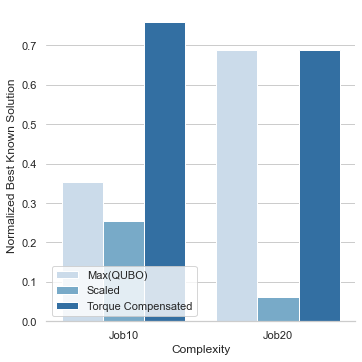

In [109]:

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Complexity", y="BKS_scale", hue="Chain Setting",
    ci=None, palette="Blues", alpha=1, legend_out=False
)
g.despine(left=True)
g.set_axis_labels("Complexity", "Normalized Best Known Solution ")
plt.legend(loc='lower left')
plt.savefig('Chain SettingsBKS.png')

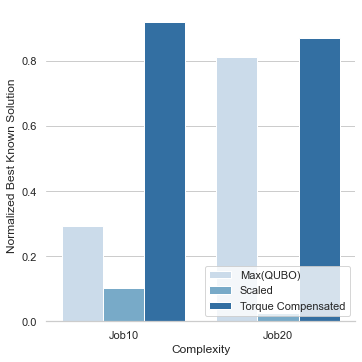

In [111]:

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Complexity", y="GKS_scale", hue="Chain Setting",
    ci=None, palette="Blues", alpha=1, legend_out=False
)
g.despine(left=True)
g.set_axis_labels("Complexity", "Normalized Best Known Solution ")
plt.legend(loc='lower right')
plt.savefig('Chain SettingsGKS.png')